<a href="https://colab.research.google.com/github/favourphilic/EverythingHamoye/blob/main/Stage_C_Quizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv('/content/drive/MyDrive/HamoyeEverything/Data_for_UCI_named.csv')
print(df.shape)
df.head()

(10000, 14)


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [31]:
from collections import Counter

In [32]:
Counter(df.stabf)

Counter({'unstable': 6380, 'stable': 3620})

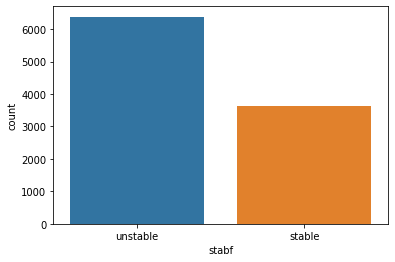

In [33]:
sns.countplot(x=df.stabf)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [35]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
tau1,10000.0,5.250000,2.742548,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,10000.0,5.250001,2.742549,0.500141,2.875140,5.249981,7.624893,9.999837
tau3,10000.0,5.250004,2.742549,0.500788,2.875522,5.249979,7.624948,9.999450
tau4,10000.0,5.249997,2.742556,0.500473,2.874950,5.249734,7.624838,9.999443
p1,10000.0,3.750000,0.752160,1.582590,3.218300,3.751025,4.282420,5.864418
p2,10000.0,-1.250000,0.433035,-1.999891,-1.624901,-1.249966,-0.874977,-0.500108
p3,10000.0,-1.250000,0.433035,-1.999945,-1.625025,-1.249974,-0.875043,-0.500072
p4,10000.0,-1.250000,0.433035,-1.999926,-1.624960,-1.250007,-0.875065,-0.500025
g1,10000.0,0.525000,0.274256,0.050009,0.287521,0.525009,0.762435,0.999937
g2,10000.0,0.525000,0.274255,0.050053,0.287552,0.525003,0.762490,0.999944


In [36]:
#sns.pairplot(df)

In [37]:
df.drop('stab', axis=1, inplace=True)

In [38]:
X= df.copy()
y=X.pop('stabf')

In [39]:
#X.head()

In [40]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1) 

In [41]:
col = x_train.columns
col

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame (scaler.fit_transform(x_train), columns=col)
X_test = pd.DataFrame ( scaler.transform(x_test), columns=col)

In [43]:
X_train.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521


In [44]:
# check xgboost version
import xgboost
print(xgboost.__version__)

0.90


In [45]:
import lightgbm as lgb

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier
rf = RandomForestClassifier()
etc = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb =  LGBMClassifier()

In [47]:
def modelbuilder(model, X_train,X_test,ytrain, ytest):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    acc = model.score(X_test, y_test)

    return acc

In [48]:
modelbuilder(rf, X_train, X_test, y_train,y_test )

0.9225

In [49]:
modelbuilder(etc, X_train, X_test, y_train,y_test )

0.9275

In [50]:
modelbuilder(gb, X_train, X_test, y_train,y_test )

0.919

In [51]:
modelbuilder(xgb, X_train, X_test, y_train,y_test )

0.9195

In [52]:
modelbuilder(lgb, X_train, X_test, y_train,y_test )

0.9375

In [53]:
n_estimators = [100,300,500,1000] # number of trees in the random forest
max_features = ['auto', 'log2',None] # number of features in consideration at every split
min_samples_split = [2, 5, 7] # minimum sample number to split a node
min_samples_leaf = [4, 6, 8] # minimum sample number that can be stored in a leaf node

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
etc_best = RandomizedSearchCV(estimator = etc,param_distributions = random_grid,
               n_iter = 10, cv = 5, verbose=1, random_state=1, n_jobs = -1)

In [55]:
etc_best.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'log2', None],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=1, verbose=1)

In [57]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', etc_best.best_params_, ' \n')

Random grid:  {'n_estimators': [100, 300, 500, 1000], 'max_features': ['auto', 'log2', None], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [4, 6, 8]} 

Best Parameters:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None}  



In [60]:
etc_new = ExtraTreesClassifier(n_estimators= 500, min_samples_split=5, min_samples_leaf= 6, max_features= None )
etc_new.fit(X_train, y_train)
acc= etc_new.score(X_test, y_test)
acc

0.9295

In [62]:
feature_importance = etc_new.feature_importances_
feature_importance

array([0.13550765, 0.13864673, 0.13219121, 0.13356725, 0.00542702,
       0.00730833, 0.00721904, 0.00698146, 0.10301788, 0.10877278,
       0.11241222, 0.10894843])

In [63]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        etc_new.estimators_],
                                        axis = 0)

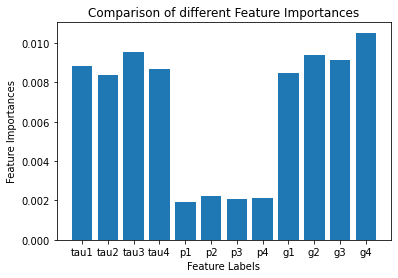

In [64]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()